## Flux Scanning based on Enforced Objective Flux

In [ ]:
from google.colab import drive
# This will prompt for authorization.

drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np

In [ ]:
from cobra.io import read_sbml_model
auto = read_sbml_model('/content/drive/MyDrive/iCre1355_auto.xml')

In [2]:
from cameo.strain_design.deterministic.flux_variability_based import FSEOF
from cobra import Reaction, Metabolite
from cameo.strain_design.heuristic.evolutionary_based import OptGene
from cameo.strain_design.deterministic.linear_programming import OptKnock

In [3]:
fseof = FSEOF(auto)
result = fseof.run(target=auto.reactions.EX_h2_e)
df= result.data_frame

In [4]:
# sorting the dataframe
df= df.sort_values([1], ascending = False)

# removing genes from dataframe 
removed_zero = (df != 0.000000).all(axis=1)
df = df.loc[removed_zero]

Text(0.5, 1.0, 'Flux scanning based on Enforced Objective Flux')

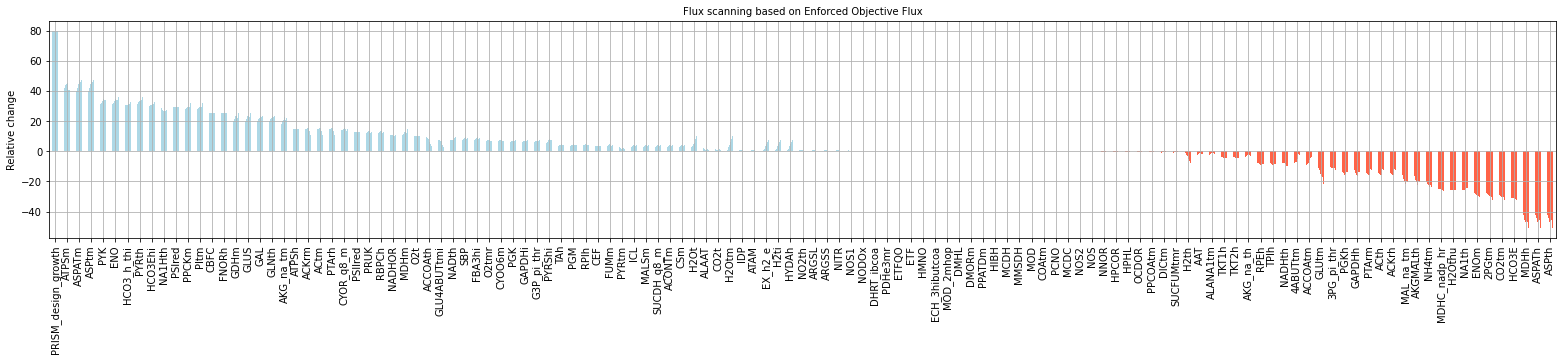

In [9]:
# color bars according to value
def bar_color(df,color1,color2):
    return np.where(df.values>0,color1,color2).T

fig = df.plot(legend=None, kind='bar', color=bar_color(df,'lightblue','tomato'),figsize=(27, 4), grid =True);
fig.set_ylabel('Relative change')
fig.set_title('Flux scanning based on Enforced Objective Flux', size=10)